In [1]:
import tensorflow as tf
tf.__version__

/opt/homebrew/Caskroom/miniconda/base/envs/TF/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


'2.9.0'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
filename=["dcnn-A100","dcnn-t4","dcnn-v100","dcnn-rtx3050"]

In [4]:
import pickle
vars2=[]
def load_variables(filename=[],vars2=[]):
    for i in range(len(filename)):
        with open(f'time_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(filename,vars2)

In [5]:
vars2

[209.22806525230408, 314.5571882724762, 325.60185384750366, 193.44189620018005]

In [6]:
filename2=["Nvidia A100","Nvidia T4","Nvidia V100","Nvidia RTX-3050"]

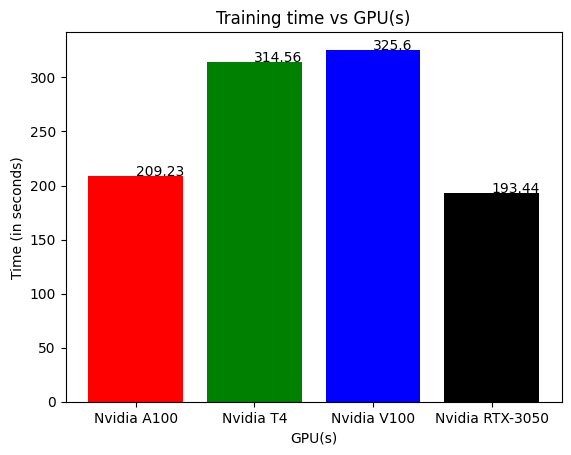

In [7]:
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],round(y[i],2))
plt.bar(filename2,height=vars2, color=["r","g","b","black"])
addlabels(filename2,vars2)
plt.title("Training time vs GPU(s)")
plt.ylabel("Time (in seconds)")
plt.xlabel("GPU(s)")
plt.savefig("plot_model/plot_dcnn_gpu//GPU_Comparision")

In [8]:
filename3 = ["history-A100","history-t4","history-v100","hist_dcnn.pkl"]

In [13]:
import pickle
def load_variables(filename=[]):
    for i in range(len(filename)):
        with open(f'history_var/{filename[i]}', 'rb') as file:
            vars2.append(pickle.load(file))
load_variables(filename,vars2)

[209.22806525230408, 314.5571882724762, 325.60185384750366, 193.44189620018005]

In [8]:
with open("history_var/hist_dcnn.pkl", "rb") as file:
        hist_dcnn = pickle.load(file)
hist_dcnn

In [25]:
for i in range(len(filenames)):
    filenames[i]+=".json"
filenames


['historyvgg19.json',
 'historyvgg16.json',
 'historyeffnetb4.json',
 'historyresnet.json']

In [1]:
def json_dump(filepath: str = "", filenames: list = [], dicts: list = []) -> None:
    """
    Saves dictionary variables as json files

    Args:
    filepath (str): path to save the file. Default is current directory
    filename (list of strings): names for each saved file
    dicts (list of dictionaires): data to be stored in a file

    Returns: None

    """
    import json
    if (len(filenames) != len(dicts)):
        raise ValueError("Input size Incompatible")
    for i in range(len(filenames)):
        python_obj = eval(str(dicts[i]))
        json_obj = json.dumps(python_obj,indent=4)
        with open(f"{filepath}/{filenames[i]}","w") as file:
            file.write(json_obj)

In [34]:
json_dump(filepath="hist_dict",
          filenames=["history_dcnn_rtx3050.json"],
          dicts=[hist_dcnn.history])

In [2]:
def json_load(filepath : str ="", filenames : list = []) -> list:
    """
    Loads json dictionaries into python variables

    Args:
    filepath (str): Path to the folder enclosing the filenames. If not provided, will look for filenames in the working directory.
    filename (list(str)): Path to the file containing data. If not provided, will look for a .jsonl or .json files in

    Returns:
    List containing python dictionaries
    """
    import json
    var = []
    for i in range(len(filenames)):
        with open(f"{filepath}/{filenames[i]}") as file:
            var.append(json.load(file))
    return var

In [40]:
import os
vars1 = os.listdir("hist_dict")
vars1

['history_dcnn_V100.json',
 'history_dcnn_rtx3050.json',
 'historyvgg16.json',
 'historyresnet.json',
 'history_dcnn_A100.json',
 'historyeffnetb4.json',
 'historyvgg19.json',
 'history_dcnn_t4.json']

In [6]:
vars_model[0]['val_accuracy'][-1],vars_model[1]['val_accuracy'][-1],vars_model[2]['val_accuracy'][-1]

TypeError: string indices must be integers

In [39]:
for i in range(len(vars_model)):
    print(f"{vars_model_names[i]} {vars_model[i]["accuracy"][-1]}")

SyntaxError: invalid syntax (1315434015.py, line 2)

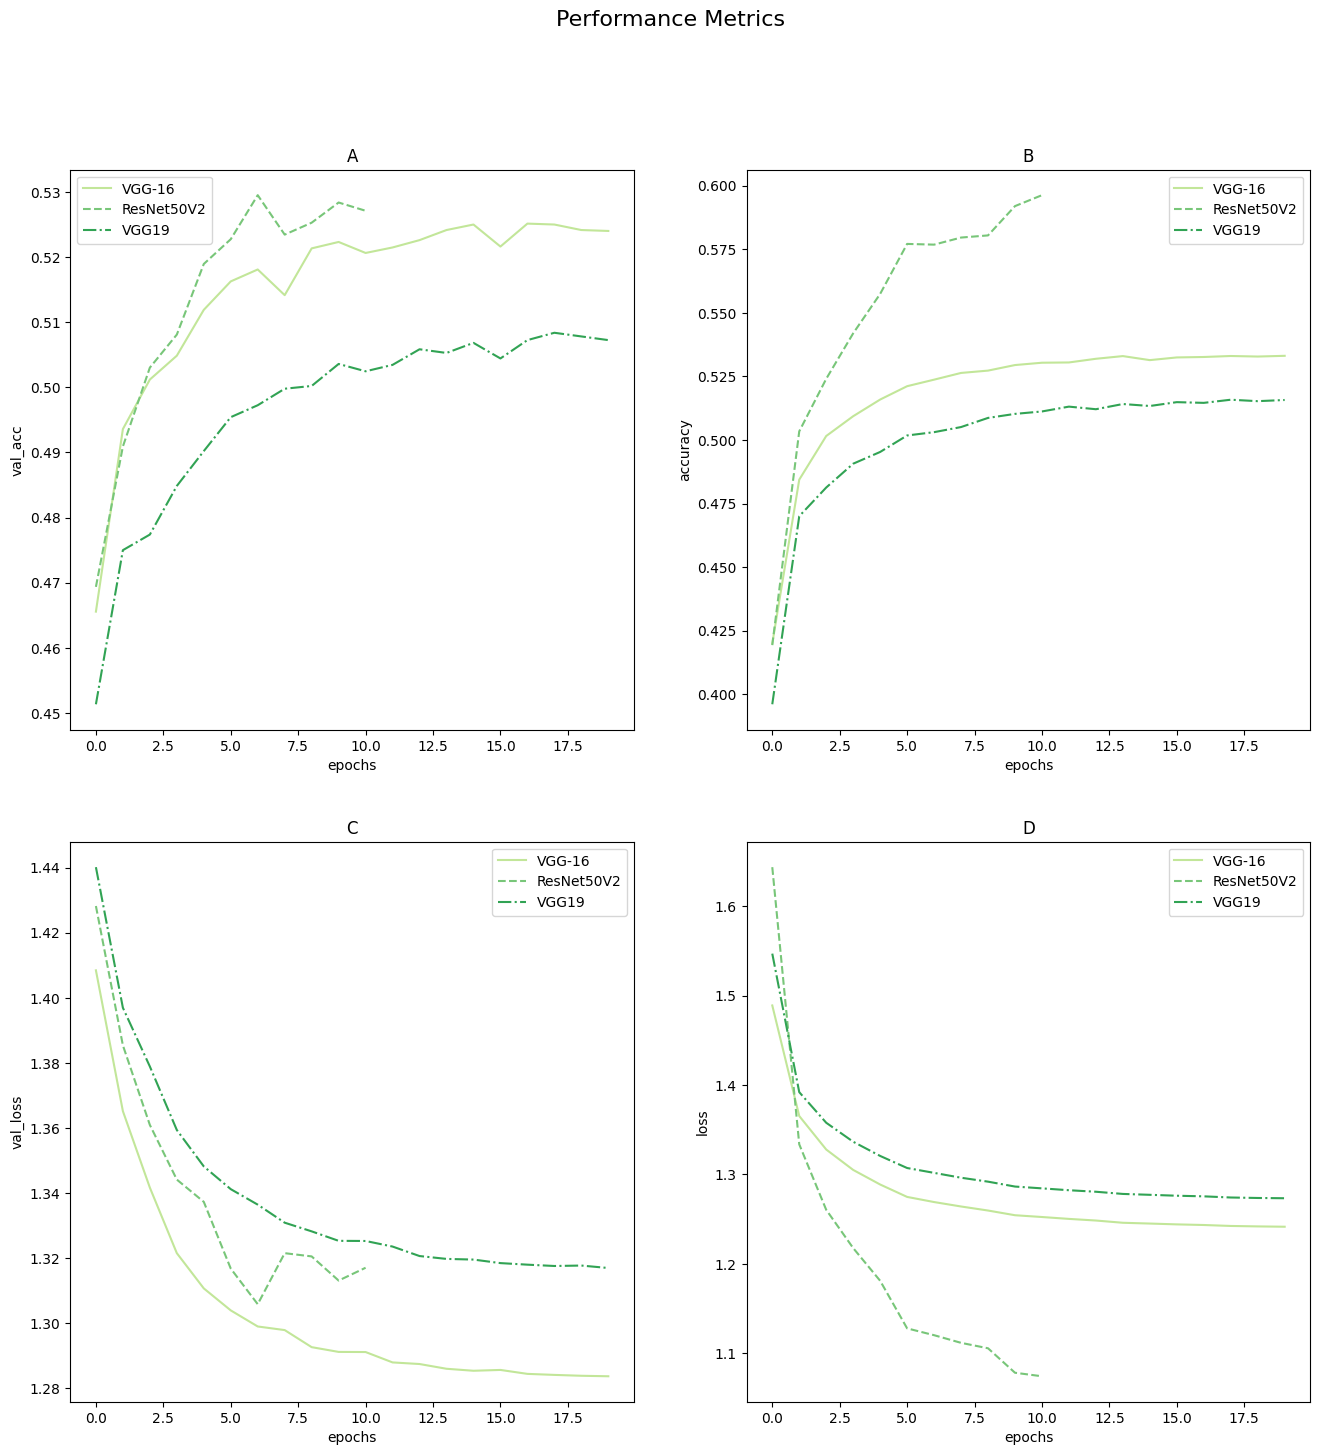

In [46]:
vars_model = json_load(filepath="hist_dict",
                       filenames=[vars1[2],vars1[3],vars1[-2]])
vars_model_names = ["VGG-16","ResNet50V2","VGG19"]
plot_hist(hist=vars_model,
          gpu_names = vars_model_names,
          savefig = True)

In [16]:
vars = json_load(filepath="hist_dict",
          filenames=["history_dcnn_A100.json","history_dcnn_t4.json","history_dcnn_V100.json","history_dcnn_rtx3050.json"])

/var/folders/bh/qs6hh2852sg8fzb0rp_t45vc0000gn/T/ipykernel_44688/50896239.py:65: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,j+1)


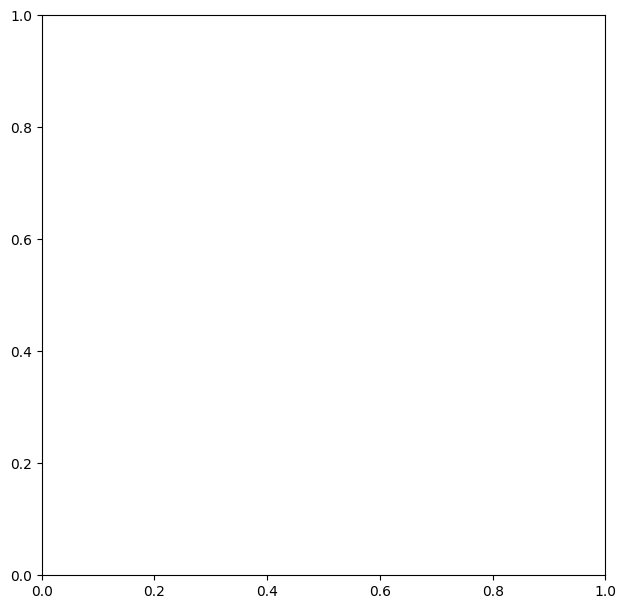

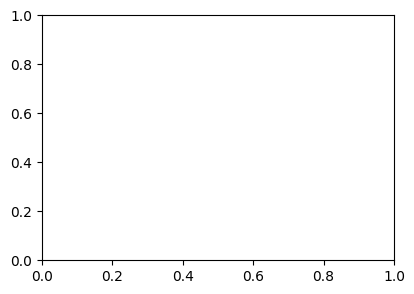

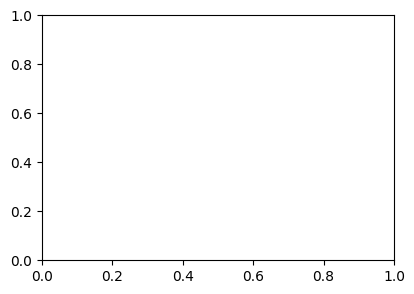

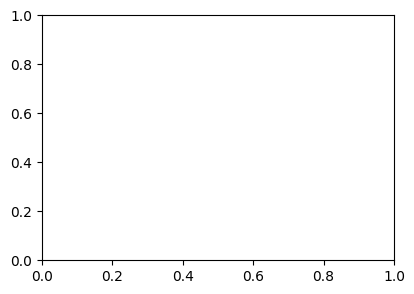

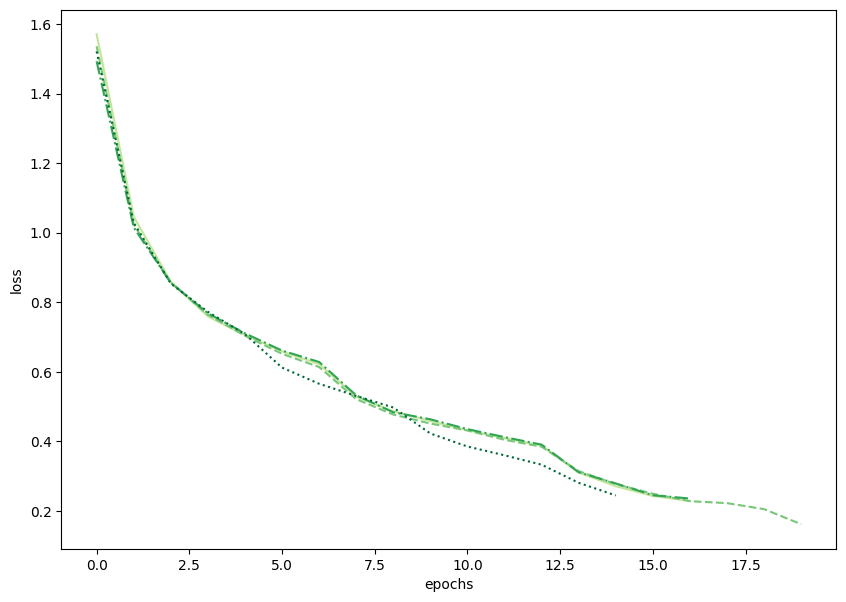

In [33]:
plot_hist(hist = vars,
            gpu_names = ["Nvidia A100","Nvidia T4","Nvidia V100","Nvidia RTX-3050"],
            savefig=True)

### Attempt #1

In [37]:
# def plot_hist(hist:list =[], gpu_names:list =[],savefig = False):
#     """
#     Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
#     """
#     if (len(hist) != len(gpu_names)):
#         raise ValueError("Wrong Input size")   
#     import matplotlib.pyplot as plt
#     val_acc=[]
#     val_loss=[]
#     loss=[]
#     accuracy=[]
#     metrics=[val_acc,accuracy,val_loss,loss]
#     metrics_title=["val_acc","accuracy","val_loss","loss"]
#     for history in hist:
#         accuracy.append(history["accuracy"][:20])
#         val_acc.append(history["val_accuracy"][:20])
#         loss.append(history["loss"][:20])
#         val_loss.append(history["val_loss"][:20])

#     # plt.figure(figsize=(16,16))
#     # c=['g','r','b','orange',"black"]
#     # c=["r","g","b","black"]
#     # c = ['#ffffcc','#c2e699','#78c679','#238443']
#     c = ['#c2e699','#78c679','#31a354','#006837']
#     for j in range(len(metrics)):
#         # plt.subplot(2,2,j+1)
#         plt.figure(figsize=(10,7))
#         for i in range(len(hist)):
#             plt.plot(metrics[j][i],c=c[i],label=gpu_names[i])
#         plt.title(f"epochs vs {metrics_title[j]}")
#         plt.xlabel("epochs")
#         plt.ylabel(metrics_title[j])
#         # plt.legend()
#         # plt.savefig(f"plot_model/plot_dcnn_gpu/{metrics_title[j]}")
#     # if savefig:
#     #     plt.savefig('plot_model/gpu_dcnn')
#     plt.show()

### Attempt #2

In [ ]:

# def plot_hist(hist:list =[], gpu_names:list =[], savefig = False):
#     """
#     Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
#     """
#     if (len(hist) != len(gpu_names)):
#         raise ValueError("Wrong Input size")   
#     import matplotlib.pyplot as plt
#     val_acc=[]
#     val_loss=[]
#     loss=[]
#     accuracy=[]
#     metrics=[val_acc,accuracy,val_loss,loss]
#     metrics_title=["val_acc","accuracy","val_loss","loss"]
#     titles = ["A","B","C","D"]
#     for history in hist:
#         accuracy.append(history["accuracy"][:20])
#         val_acc.append(history["val_accuracy"][:20])
#         loss.append(history["loss"][:20])
#         val_loss.append(history["val_loss"][:20])
#     plt.figure(figsize=(16,16))
#     # c=['g','r','b','orange',"black"]
#     # c=["r","g","b","black"]
#     # c = ['#ffffcc','#c2e699','#78c679','#238443']
#     c = ['#c2e699','#78c679','#31a354','#006837']
#     linestyles = ['-', '--', '-.', ':']  # Normal, dashed, dash-dot, dotted

#     for j in range(len(metrics)):
#         plt.subplot(2,2,j+1)
#         # plt.figure(figsize=(10,7))
#         for i in range(len(hist)):
#             plt.plot(metrics[j][i], c=c[i], linestyle=linestyles[i % len(linestyles)], label=gpu_names[i])
#         # plt.title(f"epochs vs {metrics_title[j]}")
#         plt.title(titles[j])
#         plt.xlabel("epochs")
#         plt.ylabel(metrics_title[j])
#         # plt.legend()
#         # plt.savefig(f"plot_model/plot_dcnn_gpu/{metrics_title[j]}")
#     # if savefig:
#     #     plt.savefig('plot_model/gpu_dcnn')
#     plt.show()

### Attempt #3

In [44]:
def plot_hist(hist:list =[], gpu_names:list =[],savefig = False):
    """
    Plots the Accuracy, Loss Val_Accuracy and Val_Loss of the given models in a subplot grid
    """
    if (len(hist) != len(gpu_names)):
        raise ValueError("Wrong Input size")   
    import matplotlib.pyplot as plt
    val_acc=[]
    val_loss=[]
    loss=[]
    accuracy=[]
    metrics=[val_acc,accuracy,val_loss,loss]
    metrics_title=["val_acc","accuracy","val_loss","loss"]
    titles = ["A","B","C","D"]
    for history in hist:
        accuracy.append(history["accuracy"][:20])
        val_acc.append(history["val_accuracy"][:20])
        loss.append(history["loss"][:20])
        val_loss.append(history["val_loss"][:20])
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    # c=['g','r','b','orange',"black"]
    # c=["r","g","b","black"]
    # c = ['#ffffcc','#c2e699','#78c679','#238443']
    c = ['#c2e699','#78c679','#31a354','#006837']
    linestyles = ['-', '--', '-.', ':']  # Normal, dashed, dash-dot, dotted

    for j in range(len(metrics)):
        ax = axs[j // 2, j % 2]
        for i in range(len(hist)):
            ax.plot(metrics[j][i], c=c[i], linestyle=linestyles[i % len(linestyles)], label=gpu_names[i])
        ax.set_title(titles[j])
        ax.set_xlabel("epochs")
        ax.set_ylabel(metrics_title[j])
        ax.legend()

    fig.suptitle("Performance Metrics", fontsize=16)

    if savefig:
        plt.savefig('plot_model/full_gpu_dcnn_5-6-24')
    plt.show()

In [19]:
import os

lr_var = os.listdir(path="hist_dict")[1]
lr_var

'history_dcnn_rtx3050.json'

In [22]:
lr = json_load(filepath="hist_dict",
          filenames = [lr_var])

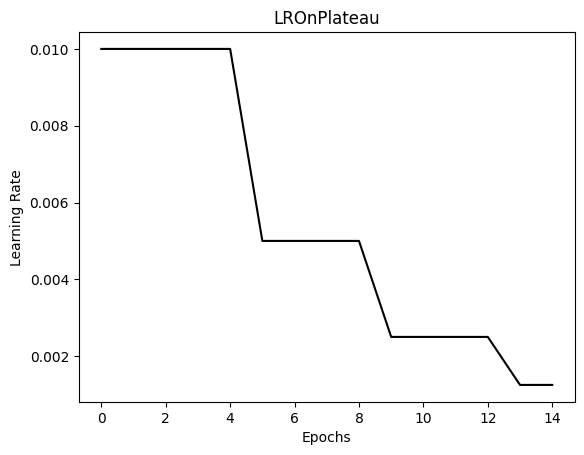

In [35]:
plt.plot(lr[0]["lr"],c="black")
plt.title("LROnPlateau")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.savefig("plot_model/plot_dcnn_gpu/lr_schedule")